In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML
print("Setup Complete")

Setup Complete


# **Titanic Data Analysis Using Logistic Regression**
In this notebook I will show how to use Logistic Regression on the Titanic Dataset. We will cover:
* What is Logistic Regression
* How is Logistic Regression different from other regression methods
* Implementation of Logistic Regression

# What is Logistic Regression

Logistic regression is a statistical model used for binary classification problems, where the target variable has only two possible outcomes. It estimates the probability of the outcome being in one of the two classes based on a set of predictor variables.

The logistic regression formula represents the relationship between the predictor variables and the logarithm of the odds of the target variable being in one of the two classes. 

log(odds) = β0 + β1x1 + β2x2 + ... + βnxn

Where:
- log(odds) represents the natural logarithm of the odds ratio, which is the probability of the event occurring divided by the probability of the event not occurring.
- β0 is the intercept term, representing the log odds when all predictor variables are set to zero.
- β1, β2, ..., βn are the coefficients or weights assigned to each predictor variable.
- x1, x2, ..., xn are the values of the predictor variables.

To convert the log odds into probabilities, we use the logistic or sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1. The formula for the sigmoid function is:

p = 1 / (1 + e^(-log(odds)))

Where:
- p represents the probability of the event occurring.
- e is the base of the natural logarithm.

By plugging in the value of log(odds) from the logistic regression formula into the sigmoid function, we can obtain the predicted probability of the outcome variable being in one of the classes.

Some benefits of Logistic Regression include:
* Easy to implemant
* Great for linearly separable datasets
* Offers insightful information

Some disadvantages of Logistic Regression are:
* Does not accept NaN
* Fails to predict a continuous outcome
* May not be accurate for small datasets

# How is Logistic Regression different from other Regression Methods
1. Dependent variable: In logistic regression, the dependent variable is binary or dichotomous (e.g., yes/no, true/false), representing categorical outcomes. Other regression methods, such as linear regression, are typically used for continuous numerical outcomes.

2. Assumptions: Linear regression assumes a linear relationship between the dependent and independent variables, while logistic regression does not make this assumption. Logistic regression models the log odds of the outcome as a linear combination of the predictors, which is transformed into probabilities using the logistic function.

3. Model output: Linear regression outputs continuous values that represent the expected value of the dependent variable, whereas logistic regression outputs the probability of the binary outcome, usually 0 or 1.

4. Coefficients interpretation: In linear regression, the coefficients directly represent the change in the dependent variable for a one-unit change in the independent variable. In logistic regression, the coefficients represent the change in the log odds of the outcome for a one-unit change in the independent variable.

5. Model evaluation: Model evaluation metrics differ between logistic regression and other regression methods. In linear regression, metrics like mean squared error are used to evaluate the model's performance. In logistic regression, metrics like accuracy, precision, recall, and F1-score are used to assess the model's predictive accuracy.

6. Model application: Logistic regression is commonly used for classification problems, such as predicting disease presence or absence, spam or non-spam emails, etc. Other regression methods, like linear regression, are used for predicting continuous outcomes such as sales revenue, housing prices, etc.

# Implementation of Logistic Regression
**Load the Dataset**

Let's first upload the Titanic dataset and view it.

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Optional: make a scrolling table**

It is up to you if you want to make a scrolling table or not. I made it because it is easier for me to view large datasets. Huge thanks to Ken Jee for his tutorial on how to make such tables.

In [3]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

make_data_table(data, 'Data')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


<function __main__.make_data_table(dataset, title)>

In [5]:
make_data_table(test, 'Test')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


<function __main__.make_data_table(dataset, title)>

**Setting the Target**

Let's set the target. The target is what we are predicting. In our case, the target is whether a person survived the wreck of the Titanic or not.

In [6]:
target = list(set(data.columns) - set(test.columns))[0]
target

'Survived'

**Feature Analysis**

Now let's do the analysis. Let's see what columns have the most influence on the target.

In [7]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Percentage of women who survived:", rate_women)

Percentage of women who survived: 0.7420382165605095


As you see, the percentage of women who survived the wreck is 74%. This is because letting children and women go first in the lifeboats is a code of conduct that is in practice by seamen for over 300 years. So, if a passenger was a female, she had more probability to survive than male passengers.

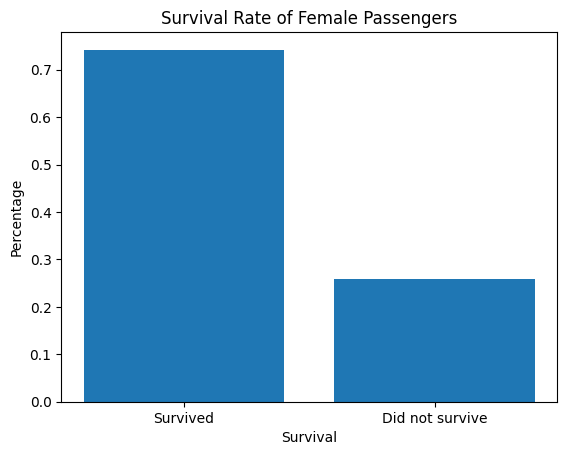

In [8]:
labels = ['Survived', 'Did not survive']
values = [rate_women, 1 - rate_women]

plt.bar(labels, values)
plt.title('Survival Rate of Female Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

In [9]:
men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Percentage of men who survived:", rate_men)

Percentage of men who survived: 0.18890814558058924


Shockingly, the percentage of men who survived the crashing of the Titanic is only 18%! This is a very alarming number when you compare it to the percentage of women who survived the wreck. So, the sex of a passenger may actually affect the possibility of survival more than you might think. 

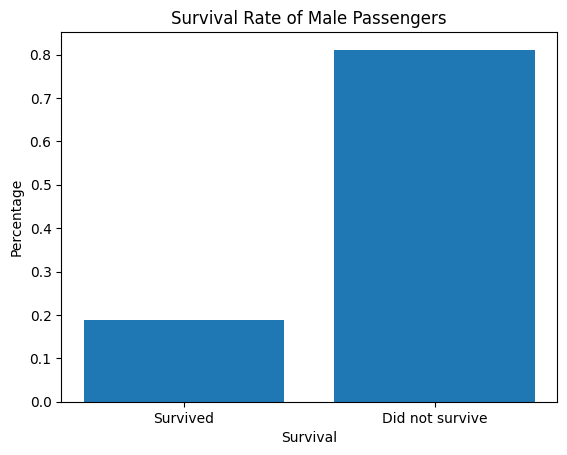

In [10]:
labels = ['Survived', 'Did not survive']
values = [rate_men, 1 - rate_men]

plt.bar(labels, values)
plt.title('Survival Rate of Male Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

**Survival Analysis Based on Age**

Age is also a very important factor. Let's make an analysis on the probability of survival based on a passenger's age.

In [11]:
children = data.loc[data.Age <= 18]['Survived']
rate_child = sum(children)/len(children)

print("Percentage of children(passengers below the age of 18) who survived:", rate_child)

Percentage of children(passengers below the age of 18) who survived: 0.5035971223021583


In here we saw the percentage of children(passengers under the age of 18) who survived the wreck. As you see, it is 38% percent. Now let's see the percentage of adults that survived the wreck.

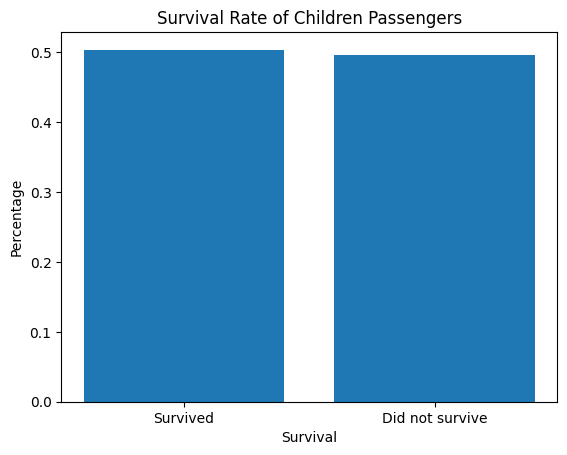

In [12]:
labels = ['Survived', 'Did not survive']
values = [rate_child, 1 - rate_child]

plt.bar(labels, values)
plt.title('Survival Rate of Children Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

In [13]:
adult = data.loc[data.Age >= 18]['Survived']
rate_adult = sum(adult)/len(adult)

print("Percentage of adults(passengers above the age of 18) who survived:", rate_adult)

Percentage of adults(passengers above the age of 18) who survived: 0.3810316139767055


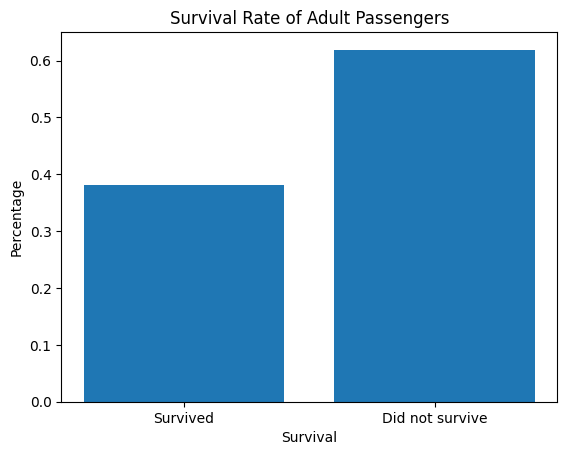

In [14]:
labels = ['Survived', 'Did not survive']
values = [rate_adult, 1 - rate_adult]

plt.bar(labels, values)
plt.title('Survival Rate of Adult Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

As you see much less adults survived than children because of the "Women and Children first" code of conduct. So, passengers under the age fo 18 have more chance on suvival than passengers older than 18.

**Survival Analysis based on Pclass**

The class that a passenger traveled in is also very important. Due to the fact that Class 1 passengers traveled in cabons on the top deck and thus were evacuated first, they had more chance of survival. Let's start by exhibitng Class 3(Lower Class).

In [15]:
cab_class3 = data.loc[data.Pclass == 3]['Survived']
rate_cab3 = sum(cab_class3)/len(cab_class3)

print("Percentage of passengers from class 3 who survived:", rate_cab3)

Percentage of passengers from class 3 who survived: 0.24236252545824846


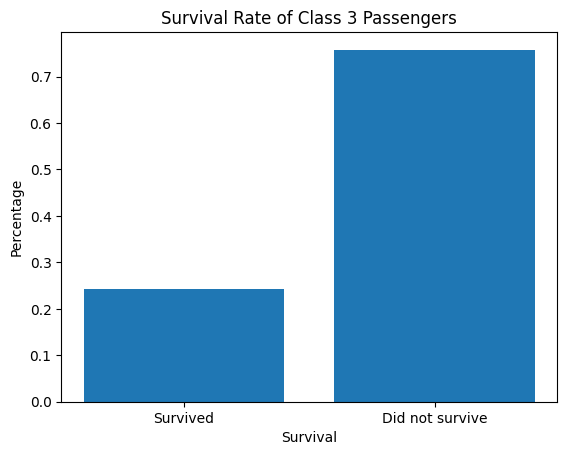

In [16]:
labels = ['Survived', 'Did not survive']
values = [rate_cab3, 1 - rate_cab3]

plt.bar(labels, values)
plt.title('Survival Rate of Class 3 Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

As to say, barely anybody from class 3 survived. Now let's look at class 2.

In [17]:
cab_class2 = data.loc[data.Pclass == 2]['Survived']
rate_cab2 = sum(cab_class2)/len(cab_class2)

print("Percentage of passengers from class 2 who survived:", rate_cab2)

Percentage of passengers from class 2 who survived: 0.47282608695652173


At 47%, the survival rate of class 2 passengers is a bit more.

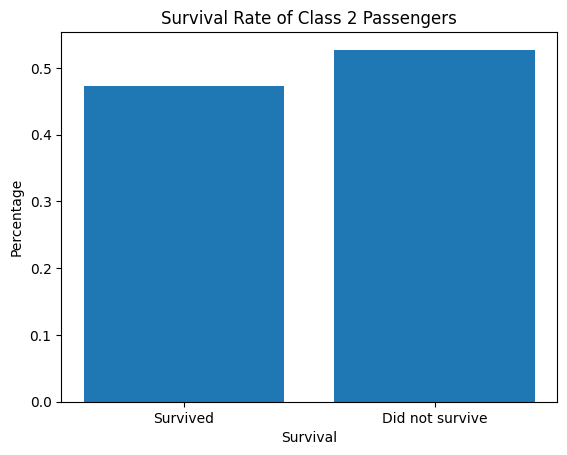

In [18]:
labels = ['Survived', 'Did not survive']
values = [rate_cab2, 1 - rate_cab2]

plt.bar(labels, values)
plt.title('Survival Rate of Class 2 Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

Now, let's observe class 1.

In [19]:
cab_class1 = data.loc[data.Pclass == 1]['Survived']
rate_cab1 = sum(cab_class1)/len(cab_class1)

print("Percentage of passengers from class 1 who survived:", rate_cab1)

Percentage of passengers from class 1 who survived: 0.6296296296296297


The survival rate of class 1 is a whole lot more than the survival rate of class 3 passengers. The Pclass that a passenger traveled in was of very large importantce because the passengers of class 1 were evactuated first, then class 2 passengers followed them, and the last ones off were the passengers of the 3rd class.

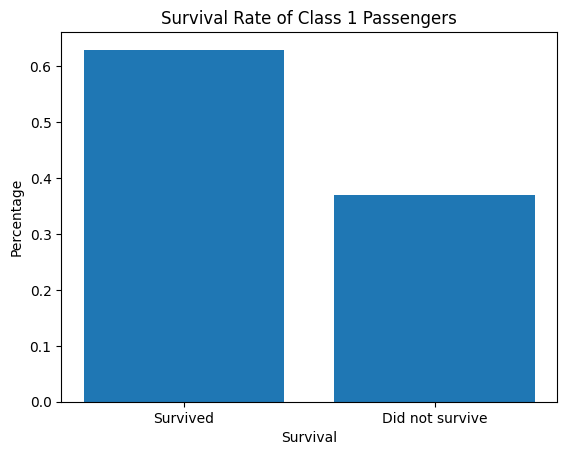

In [20]:
labels = ['Survived', 'Did not survive']
values = [rate_cab1, 1 - rate_cab1]

plt.bar(labels, values)
plt.title('Survival Rate of Class 1 Passengers')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

**Survival Analysis based on SipSp and Parch Columns**

Now, let's see if the columns "SipSp" and "Parch" have any weight in the survival rate of passengers.

In [21]:
sibsp = data.loc[data.SibSp > 0]['Survived']
rate_sibsp = sum(sibsp)/len(sibsp)

print("Percentage of passengers with siblings or spouses who survived:", rate_sibsp)

Percentage of passengers with siblings or spouses who survived: 0.4664310954063604


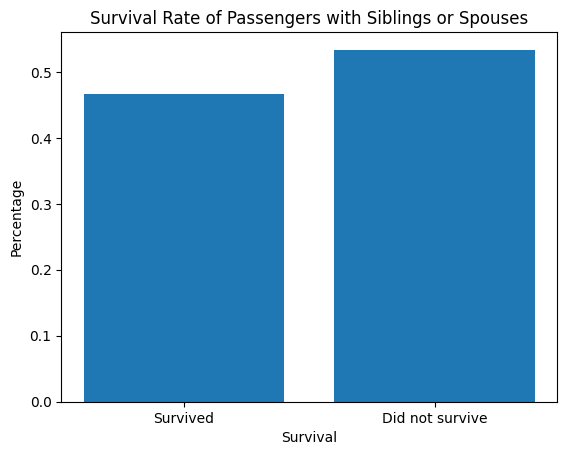

In [22]:
labels = ['Survived', 'Did not survive']
values = [rate_sibsp, 1 - rate_sibsp]

plt.bar(labels, values)
plt.title('Survival Rate of Passengers with Siblings or Spouses')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

In [23]:
parch = data.loc[data.Parch > 0]['Survived']
rate_parch = sum(parch)/len(parch)

print("Percentage of passengers with parents or children who survived:", rate_parch)

Percentage of passengers with parents or children who survived: 0.5117370892018779


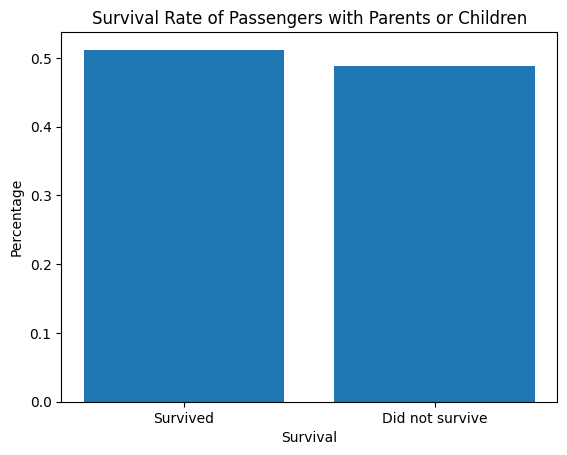

In [24]:
labels = ['Survived', 'Did not survive']
values = [rate_parch, 1 - rate_parch]

plt.bar(labels, values)
plt.title('Survival Rate of Passengers with Parents or Children')
plt.xlabel('Survival')
plt.ylabel('Percentage')
plt.show()

As you see, these columns have some weight on the survival rate. So, we will include them in our model.

**Missing Data Analysis**

Now let's take a look at the number of missing data and see what columns should be included in our model.

In [25]:
missing_data = data.isnull().any()
missing_data

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

The script above shows what columns have any missing data. Let's take a look at the dataset itself and see for ourselves.

In [26]:
make_data_table(data, 'Data')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


<function __main__.make_data_table(dataset, title)>

Now, let's make a table that will show the percentage of missing data.

In [27]:
missin_per = (data.isnull().sum() / len(data)) * 100
missin_per_html = scroll_table(missin_per.to_frame(), 'missin_per', 'Percentage of Missing Data')
display(HTML(missin_per_html))

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Then let's take a look at how much null valies are there in each column of the dataset.

In [28]:
null_val = data.isnull().sum()
html_null_val = scroll_table(null_val.to_frame(), 'null_val', 'Null values in Data')
display(HTML(html_null_val))

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Let's drop two useless columns; "Embarked" and "Cabin". These columns have lots of missing data and they don't impact the survival rate of the passengers.

In [29]:
data = data.drop(columns=['Embarked', 'Cabin'])
make_data_table(data, 'Data')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708


<function __main__.make_data_table(dataset, title)>

**Make the Model**

Finally, lets create the model.

In [30]:
y = data['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch",]
X = pd.get_dummies(data[features])
X_test = pd.get_dummies(test[features])

model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X_test)

**Evaluate Accuracy**

Next, let's evaluate the accuracy of the model.

In [31]:
def evaluate_model_accuracy(model, X, y_true):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

In [32]:
accuracy = evaluate_model_accuracy(model, X, y)
print("Model accuracy:", accuracy)

Model accuracy: 0.8002244668911336


**Generate a Submission**

At last, let's generate a submission.

In [33]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('Titanicsubmission.csv', index=False)
print("Submission Generated Successfully")

Submission Generated Successfully


I hope this notebook helped! God bless you.